## Análise de FP e FN

<br>

Neste Notebook será analisado os documentos que foram classificados errados e tentar entender o porquê.

In [180]:
# Importando Ferramentas Básicas

import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", None, "display.max_columns", None)

Importante notar que esses são os dados para:

<br>

- ***Modelo*** = ComplementNB 
<br>

- ***Num Atributos*** = 500
<br>

-  ***Random State*** = 99
<br>

- ***Tamanho Teste*** = 25%

## Importação de Dados

In [171]:
# Importando Dados

# DataFrame com textos, categoria, tokens e núm. de tokens
FP = pd.read_csv('False Positive_ComplementNB_500.csv')
FN = pd.read_csv('False Negative_ComplementNB_500.csv')
Total = pd.read_csv('noticias_final_alterado_limpo_500.csv')

# Atributos Selecionados Pós Chi^2 e Mis
Total_atributos = pd.read_csv('noticias_final_500_atributos_selecionados.csv', index_col = 'Unnamed: 0')
FP_atributos = pd.read_csv('noticias_final_FP_atributos_selecionados.csv', index_col = 'Unnamed: 0')
FN_atributos = pd.read_csv('noticias_final_FN_atributos_selecionados.csv', index_col = 'Unnamed: 0')

In [196]:
# Juntando os dados

Total['Classificação'] = ['Errada' if index in list(list(FN['Unnamed: 0']) + list(FP['Unnamed: 0'])) else 'Certa' for index in Total.index]

# Salvando DataFrame
Total.to_csv('Total_com_Class.csv')

# Visualizando modificações
Total.head()

,assunto,categoria,lista_tokens,tamanho_lista_tokens,Classificação
0,﻿\n novo plano de investimento da petrobras s...,1,"['queda', 'bilhões', 'resposta', 'fontes', 'em...",23,Certa
1,﻿\n\npor *lauro jardim*\n\n10/01/2016 • 06:31\...,1,"['estima', 'dias', 'divulgaçãodivulgação', 'em...",4,Certa
2,﻿ grupo francês cnp negocia compra da pan seg...,1,"['ano', 'poderia', 'mercado', 'divisão', 'açõe...",12,Certa
3,﻿ destino de distribuidoras da eletrobras pod...,1,"['unânime', 'advogados', 'bilionário', 'martin...",20,Certa
4,﻿ banco suíço fez oferta ao btg por controle ...,1,"['credit', 'negócios', 'ano', 'autoridade', 'e...",18,Certa


## Análise Quantitativa

<br>

Vamos agora ver qual é a relação entre o número de tokens e classificação.

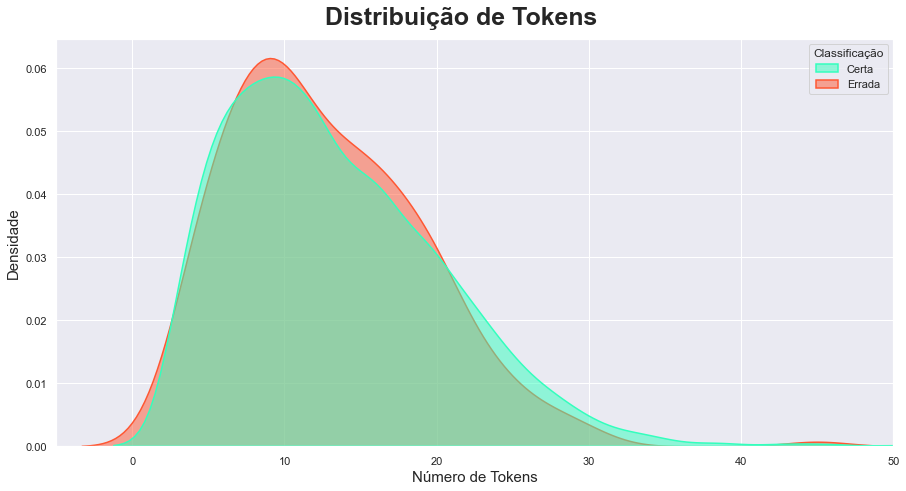

In [188]:
sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize = (15,7.5))

ax = sns.kdeplot(data = Total, 
                  x = 'tamanho_lista_tokens',
                  hue = 'Classificação',
                  palette = {"Certa": "#33FFBD",  'Errada': "#FF5733"},
                  fill = True, 
                  common_norm = False, 
                  alpha = .5, 
                  linewidth = 1.5)

fig.suptitle('Distribuição de Tokens', fontsize = 25, fontweight = 'bold', y = 0.94)

plt.ylabel('Densidade', fontsize = 15, y = 0.5)
plt.xlabel('Número de Tokens', fontsize = 15, x = 0.5)

ax.set_xlim([-5, 50])

fig.savefig('Distribuicao_Tokens.png');

In [165]:
def dic_values():
    
    dic = {}
    
    dic = {'0': ['Class. Certa',
                 round(Total.tamanho_lista_tokens[Total['Classificação'] == 'Certo'].mean(),2),
                 Total.tamanho_lista_tokens[Total['Classificação'] == 'Certo'].min(),
                 Total.tamanho_lista_tokens[Total['Classificação'] == 'Certo'].max()],
           '1': ['Class. Errada',
                 round(Total.tamanho_lista_tokens[Total['Classificação'] == 'Errado'].mean(),2),
                 Total.tamanho_lista_tokens[Total['Classificação'] == 'Errado'].min(),
                 Total.tamanho_lista_tokens[Total['Classificação'] == 'Errado'].max()]}
    
    df = pd.DataFrame.from_dict(dic,
                              orient = 'index',
                              columns = ['Tipo',
                                         'Média',
                                         'Mínimo', 
                                         'Máximo'])
    return df

In [166]:
dic_values()

,Tipo,Média,Mínimo,Máximo
0,Class. Certa,13.32,3,62
1,Class. Errada,12.78,3,45


## Análise Qualitativa

<br>

Aqui vamos analisar que tipo de Tokens se encontram nos que não foram classificados corretamente.

In [190]:
FN_atributos.tail()

,atributos
184,ativo
185,atual
186,altas
187,atualizado
188,empresas
